<a href="https://colab.research.google.com/github/YuLiuPotato/AP40012_project/blob/testing_colad_in_github/AP40012_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AP40012 Project
Group 1

(Some rough idea, please also try something you want to try)


In [1]:
# used packages in the project
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
print('testing')

testing


In [ ]:
covid_raw = pd.read_csv('covid_19_data.csv')
covid_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              236017 non-null  int64  
 1   ObservationDate  236017 non-null  object 
 2   Province/State   173972 non-null  object 
 3   Country/Region   236017 non-null  object 
 4   Last Update      236017 non-null  object 
 5   Confirmed        236017 non-null  float64
 6   Deaths           236017 non-null  float64
 7   Recovered        236017 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.4+ MB


In [ ]:
region_name = "Hong Kong"
covid = covid_raw.loc[covid_raw['Province/State'] == region_name]

covid_train = covid[:300]
covid_test = covid[301:]
covid_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 12 to 157140
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              300 non-null    int64  
 1   ObservationDate  300 non-null    object 
 2   Province/State   300 non-null    object 
 3   Country/Region   300 non-null    object 
 4   Last Update      300 non-null    object 
 5   Confirmed        300 non-null    float64
 6   Deaths           300 non-null    float64
 7   Recovered        300 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ KB


In [ ]:
col_n = ['Confirmed','Deaths','Recovered']
HK = pd.DataFrame(covid_train,columns = col_n)
HK_test = pd.DataFrame(covid_test,columns = col_n)
HK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 12 to 157140
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  300 non-null    float64
 1   Deaths     300 non-null    float64
 2   Recovered  300 non-null    float64
dtypes: float64(3)
memory usage: 9.4 KB


In [ ]:
def generateCsv(df, file_name, move_forward = 0): # generate csv file
    # use the data of day x as dependent variables(Y-vairables)
    # data of day (x-moveForward) to day (x-1) will be the X-vairables
    tempArray = np.array(df)
    start_day_index = move_forward
    with open(file_name+'.csv','w') as output:
        write_c = lambda x: output.write(str(x)+',')
        write_n = lambda x: output.write(str(x)+'\n')
        Range = lambda x: range(x+1)
        def new_label(label, day):
            if (day == move_forward):
                return label
            else:
                return label+'_'+str(move_forward-day)+'_day(s)_ago'
        # first line
        for _ in Range(move_forward):
            write_c(new_label('Infected',_))
            write_c(new_label('Confirmed',_))
            write_c(new_label('Deaths',_))
            if ( _ == move_forward):
                write_n(new_label('Recovered',_))
            else:
                write_c(new_label('Recovered',_))
        # data
        for index in range(start_day_index,len(tempArray)):
            for _ in Range(move_forward):
                write_c(tempArray[index-move_forward+_][0]-tempArray[index-move_forward+_][1]-tempArray[index-move_forward+_][2])
                write_c(tempArray[index-move_forward+_][0])
                write_c(tempArray[index-move_forward+_][1])
                if ( _ == move_forward):
                    write_n(tempArray[index-move_forward+_][2])
                else:
                    write_c(tempArray[index-move_forward+_][2]) 

In [ ]:
generateCsv(HK,'HK_new',5)
generateCsv(HK_test,'HK_new_test',5)

In [ ]:
df = pd.read_csv('HK_new.csv')
df_test = pd.read_csv('HK_new_test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Infected_5_day(s)_ago   295 non-null    float64
 1   Confirmed_5_day(s)_ago  295 non-null    float64
 2   Deaths_5_day(s)_ago     295 non-null    float64
 3   Recovered_5_day(s)_ago  295 non-null    float64
 4   Infected_4_day(s)_ago   295 non-null    float64
 5   Confirmed_4_day(s)_ago  295 non-null    float64
 6   Deaths_4_day(s)_ago     295 non-null    float64
 7   Recovered_4_day(s)_ago  295 non-null    float64
 8   Infected_3_day(s)_ago   295 non-null    float64
 9   Confirmed_3_day(s)_ago  295 non-null    float64
 10  Deaths_3_day(s)_ago     295 non-null    float64
 11  Recovered_3_day(s)_ago  295 non-null    float64
 12  Infected_2_day(s)_ago   295 non-null    float64
 13  Confirmed_2_day(s)_ago  295 non-null    float64
 14  Deaths_2_day(s)_ago     295 non-null    fl

In [ ]:
infectant_df = pd.DataFrame( df ,columns = ['Infected'])
confirm_df = pd.DataFrame( df ,columns = ['Confirmed'])
death_df = pd.DataFrame( df ,columns = ['Deaths'])
recover_df = pd.DataFrame( df ,columns = ['Recovered'])
infectant_df_test = pd.DataFrame( df_test ,columns = ['Infected'])

infectant_ar = np.c_[infectant_df]
confirm_ar = np.c_[confirm_df]
death_ar = np.c_[death_df]
recover_ar = np.c_[recover_df]
infectant_ar_test = np.c_[infectant_df_test]

days = np.array(range(1,np.size(confirm_ar)+1))
days_test = np.array(range(1,np.size(infectant_ar_test)+1))

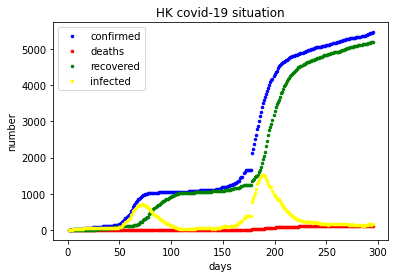

In [ ]:
plt.plot(days,confirm_ar,marker='.',lw=0,c='blue',ms=5,label='confirmed')
plt.plot(days,death_ar,marker='.',lw=0,c='red',ms=5,label='deaths')
plt.plot(days,recover_ar,marker='.',lw=0,c='green',ms=5,label='recovered')
plt.plot(days,infectant_ar,marker='.',lw=0,c='yellow',ms=5,label='infected')
plt.title("HK covid-19 situation")
plt.xlabel('days')
plt.ylabel('number')
plt.legend()
plt.show()

In [ ]:
X = np.array(df.iloc[:,list(range(20))])
X_test = np.array(df_test.iloc[:,list(range(20))])
print(X.shape)

(295, 20)


In [ ]:
model = LinearRegression()
model.fit(X,infectant_ar)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = model.predict(X_test)

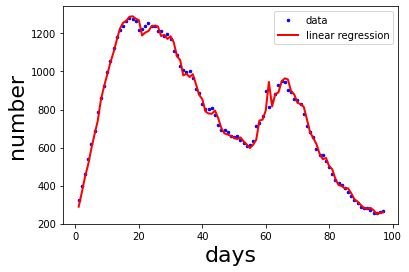

In [ ]:
plt.plot(days_test,infectant_ar_test,marker='.',lw=0,c='b',ms=5,label='data')
plt.plot(days_test,y_predict,marker='o',ms=0,lw=2,color='r',label='linear regression')
plt.xlabel('days',fontsize=22)
plt.ylabel('number',fontsize=22)
plt.legend()
plt.show()

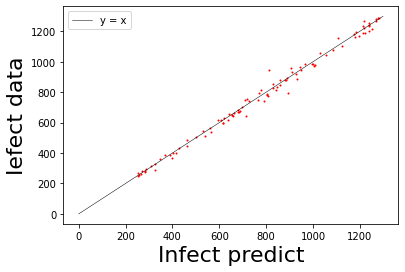

In [ ]:
plt.plot(infectant_ar_test,y_predict,marker='.',color='r',lw=0.0,ms=2.0)
plt.plot(range(1300),range(1300),color='k',lw=0.5,label='y = x')
plt.xlabel('Infect predict',fontsize=22)
plt.ylabel('Iefect data',fontsize=22)
plt.legend()
plt.show()

In [ ]:
def r2(y,Y):
  m = len(y)
  mu = np.mean(y)
  ss_res = 0
  ss_tot = 0
  for i in range(m):
    ss_res += (y[i]-Y[i])**2
    ss_tot += (y[i]-mu)**2
  return 1-ss_res/ss_tot
print((r2(infectant_ar_test,y_predict)))

[0.99165883]
